# Homework 1

## Madison E. Chester

### Exercise 1

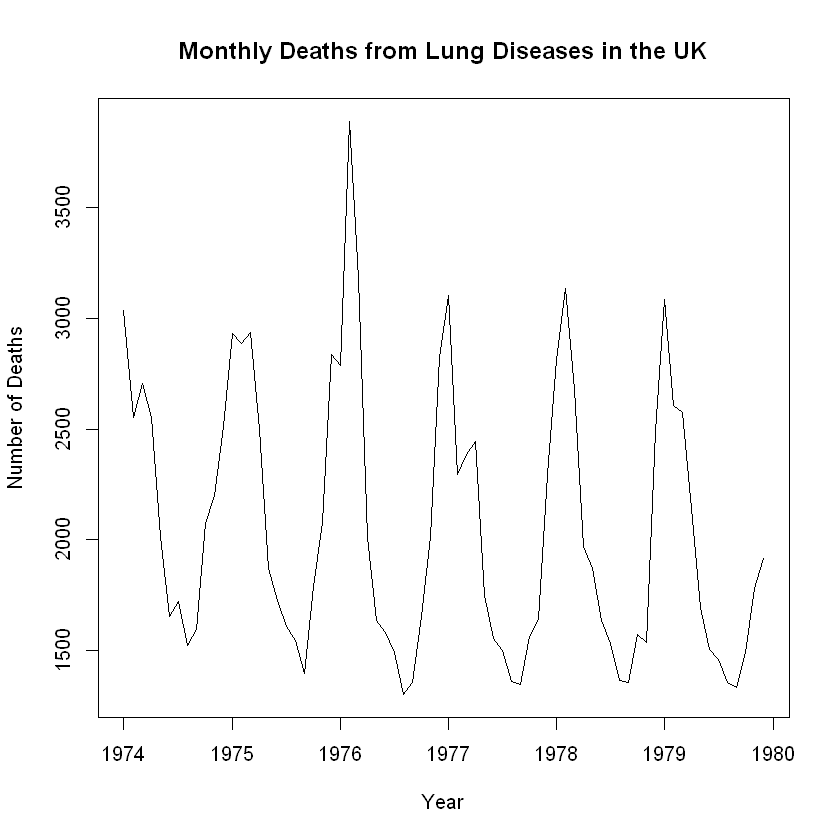

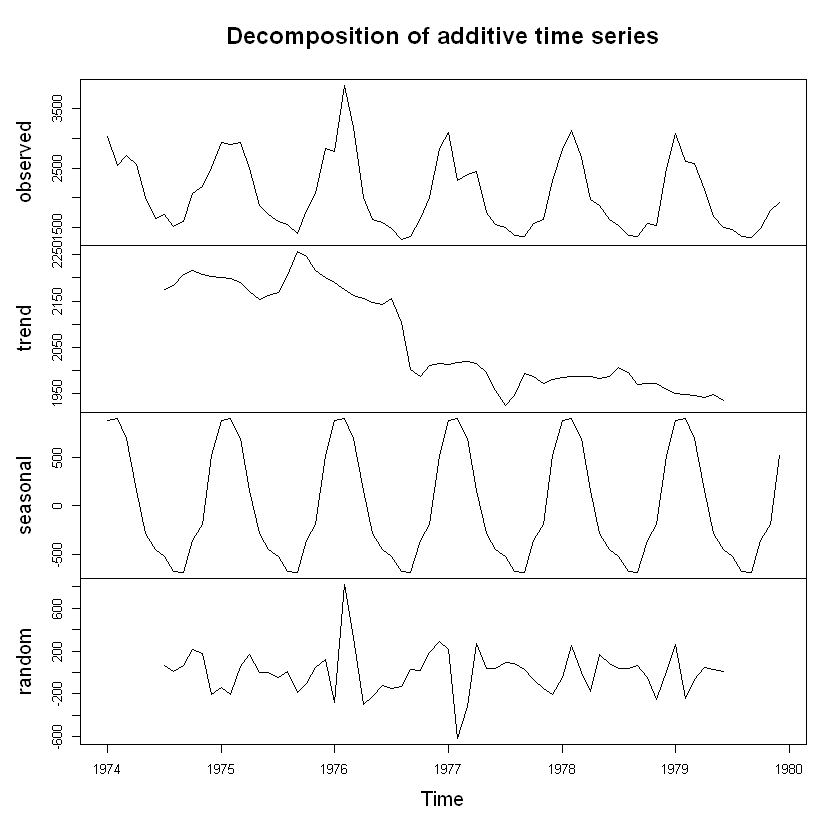

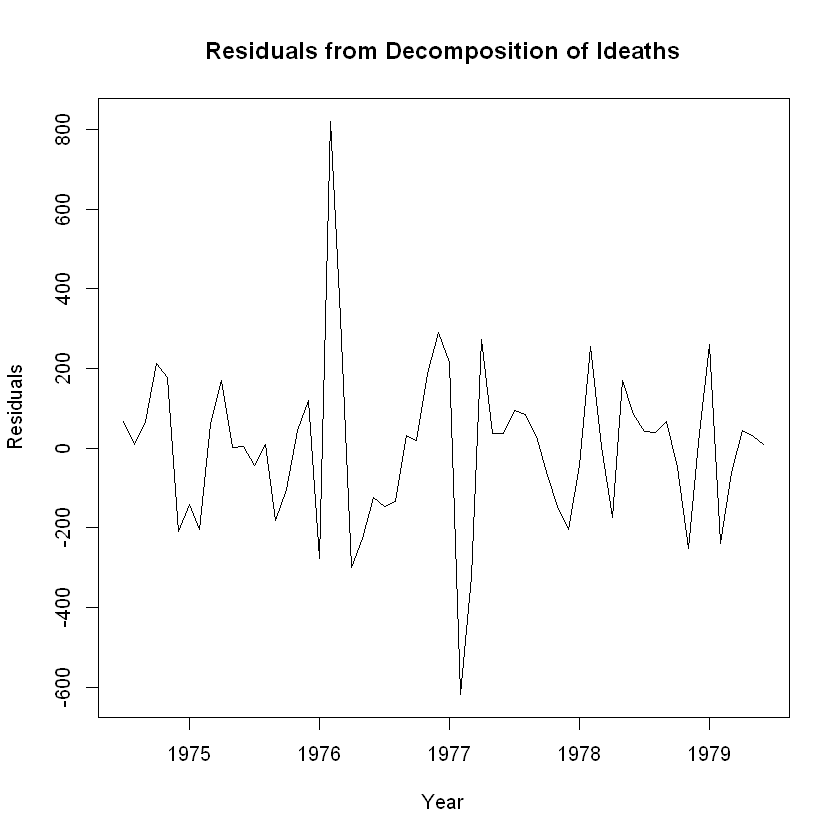

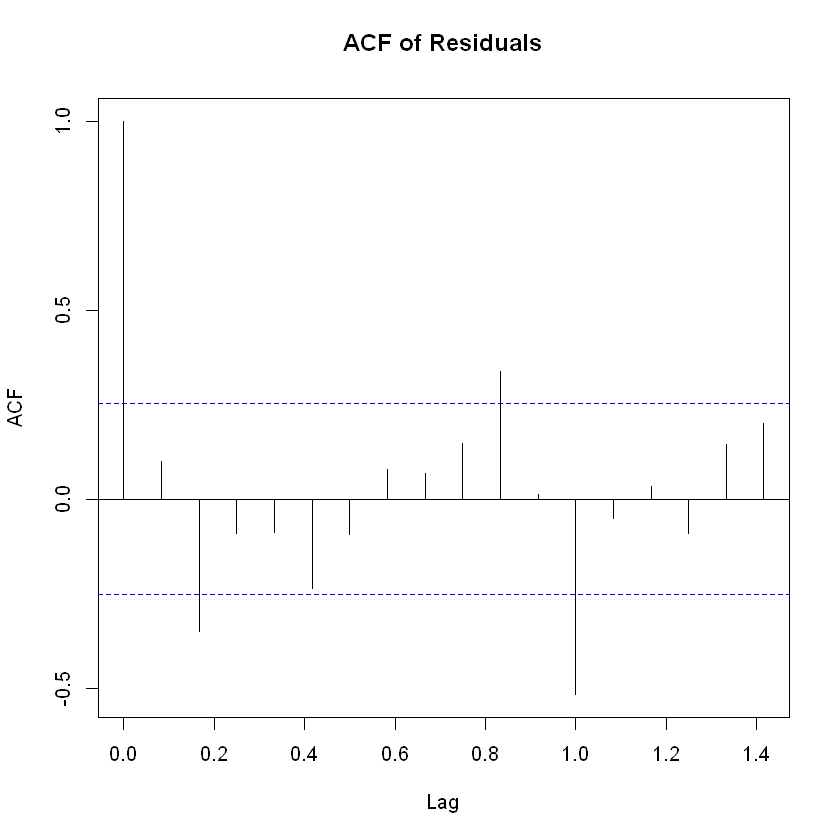

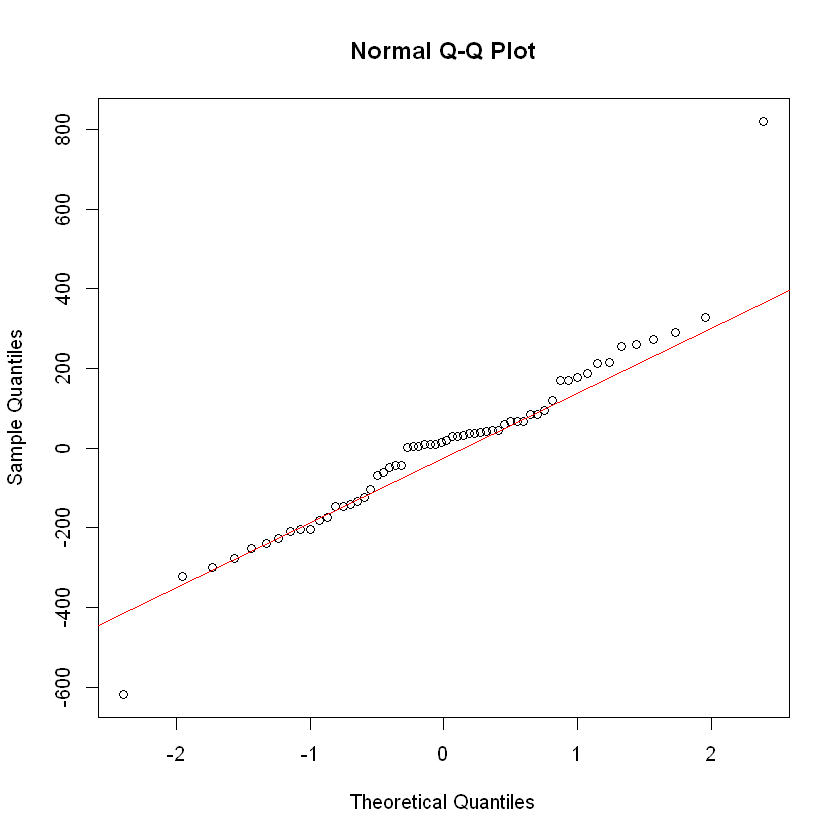

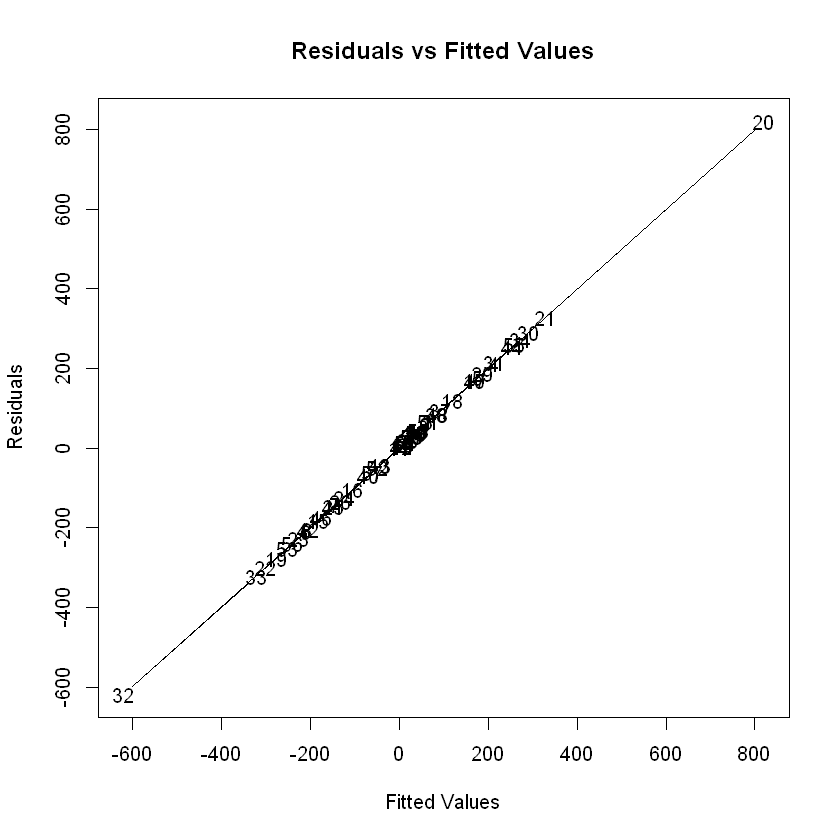

In [ ]:
# plot the time series
plot(ldeaths, main = "Monthly Deaths from Lung Diseases in the UK", xlab = "Year", ylab = "Number of Deaths")

# decompose the time series
ldeaths_decomp <- decompose(ldeaths)

# plot the decomposed components
plot(ldeaths_decomp)

# extract components
trend <- ldeaths_decomp$trend
seasonal <- ldeaths_decomp$seasonal
residuals <- ldeaths_decomp$random

# remove NA values from residuals
residuals <- na.omit(residuals)

# plot the residuals
plot(residuals, main = "Residuals from Decomposition of ldeaths", xlab = "Year", ylab = "Residuals")

# plot ACF of the residuals
acf(residuals, main = "ACF of Residuals")

# Q-Q plot
qqnorm(residuals)
qqline(residuals, col="red")

# plot residuals vs. fitted values
fitted_values <- ldeaths - trend - seasonal
plot(fitted_values, residuals, main = "Residuals vs Fitted Values", xlab = "Fitted Values", ylab = "Residuals")

In [ ]:
# Shapiro-Wilk test
shapiro.test(residuals)


	Shapiro-Wilk normality test

data:  residuals
W = 0.93312, p-value = 0.0027


#### Analysis of Residuals: Are They IID Noise?

To determine if the residuals from the time series decomposition are independent and identically distributed (IID), several checks were performed:

##### 1. Shapiro-Wilk Normality Test

The Shapiro-Wilk test results are:

- **W = 0.93312**
- **p-value = 0.0027**

**Interpretation**: The p-value is less than 0.05, which suggests rejecting the null hypothesis of normality. This indicates that the residuals are not normally distributed.

##### 2. Residuals vs. Fitted Values Plot

The plot of residuals against fitted values shows a noticeable pattern instead of random scatter.

**Interpretation**: Ideally, residuals should be randomly scattered around zero if they have constant variance and no pattern. The observed pattern suggests potential issues with the model fit.

##### 3. Q-Q Plot

The Q-Q plot shows some deviations from the straight line, especially at the tails.

**Interpretation**: While the Q-Q plot suggests that the residuals roughly follow a normal distribution, the Shapiro-Wilk test indicates otherwise. Visual assessment alone is not sufficient to confirm normality.

##### 4. Autocorrelation Function (ACF) Plot

The ACF plot of the residuals shows some significant spikes.

**Interpretation**: Significant spikes in the ACF plot indicate that the residuals are autocorrelated, meaning they are not independent. This violates one of the key assumptions of IID residuals.

#### Conclusion

Based on the analysis, the residuals from the decomposition of the `ldeaths` time series are **not** a sample of IID noise. Specifically:

- The residuals are not normally distributed (Shapiro-Wilk p-value < 0.05).
- The residuals exhibit autocorrelation (significant spikes in the ACF plot).
- The residuals vs. fitted values plot shows a pattern, indicating potential issues with the model fit.

This conclusion implies that further modeling or different methods might be necessary to better capture the structure in the `ldeaths` time series data.

### Exercise 2

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


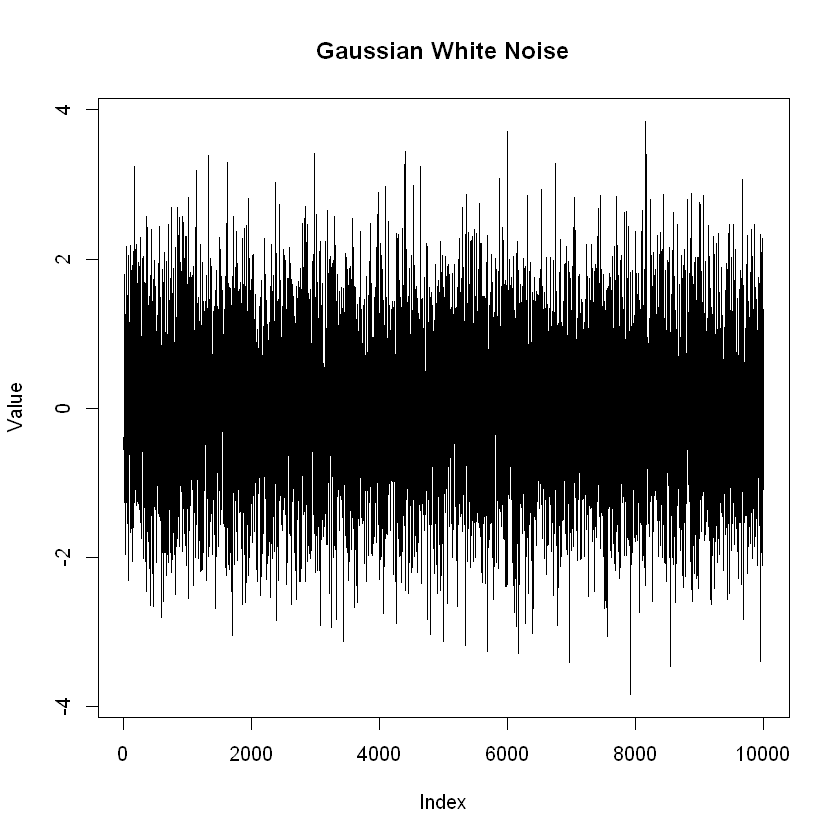

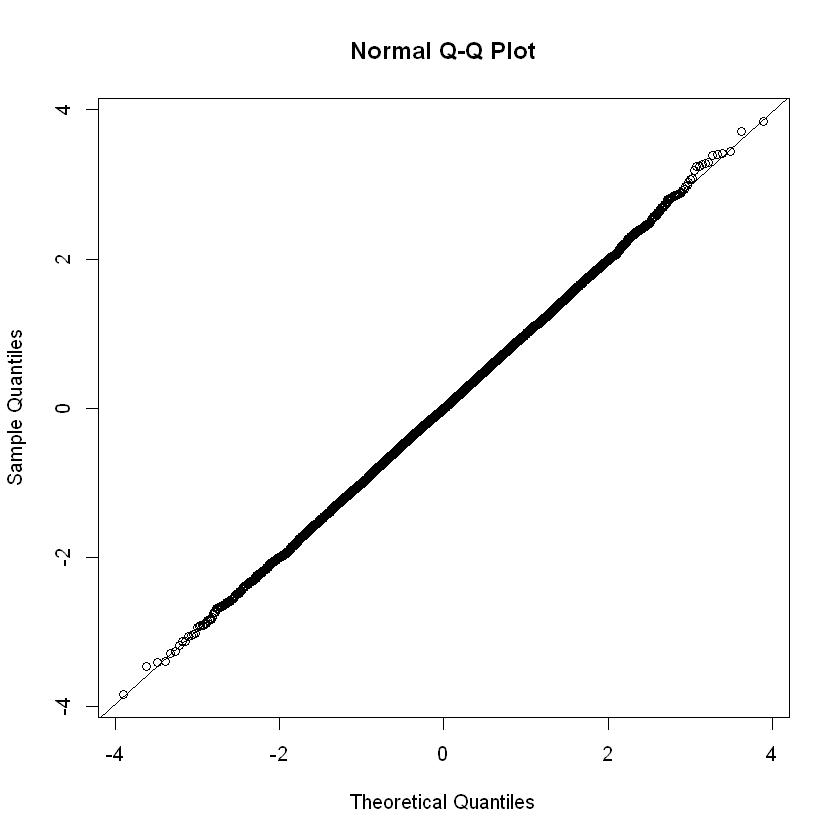

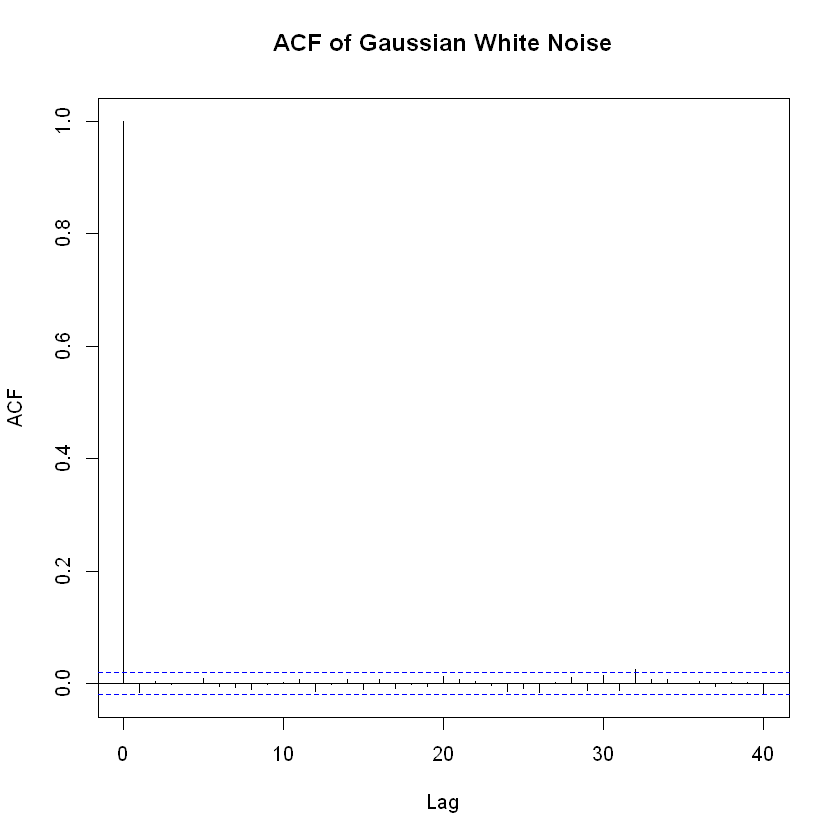

In [ ]:
set.seed(123)
library(tseries)

# simulate a gaussian white noise
n <- 10000
gaussian_white_noise <- rnorm(n)

# plot the simulated data
plot(gaussian_white_noise, type = "l", main = "Gaussian White Noise", xlab = "Index", ylab = "Value")

# plot the QQ plot
qqnorm(gaussian_white_noise)
qqline(gaussian_white_noise)

# plot ACF
acf(gaussian_white_noise, main = "ACF of Gaussian White Noise")

In [ ]:
# perform Ljung-Box test for independence
ljung_box_gwn <- Box.test(gaussian_white_noise, type = "Ljung-Box")
ljung_box_gwn


	Box-Ljung test

data:  gaussian_white_noise
X-squared = 2.5211, df = 1, p-value = 0.1123


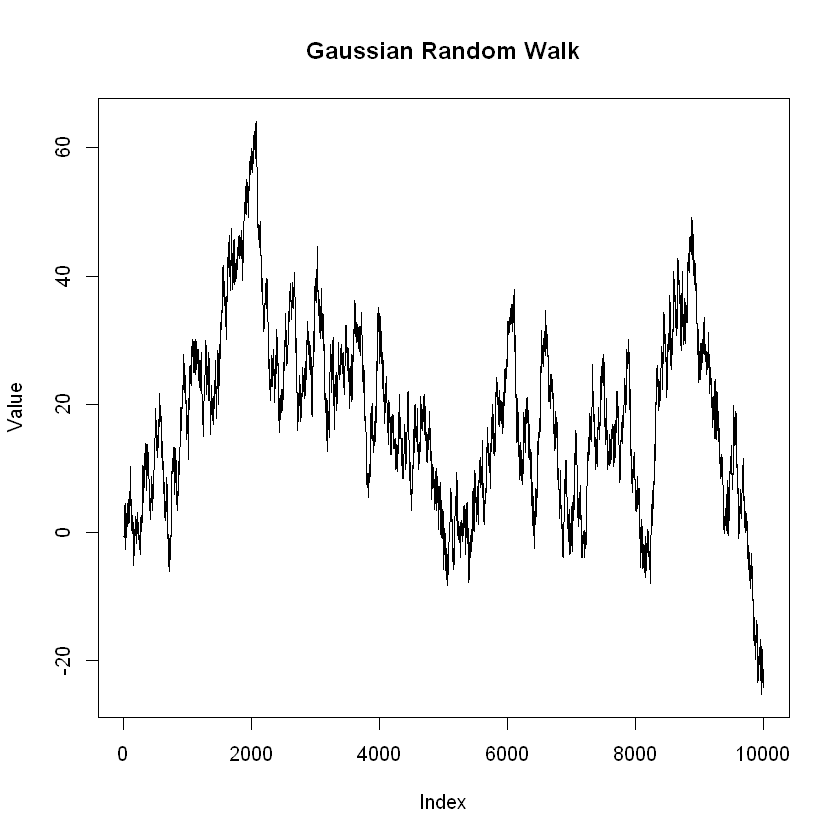

In [ ]:
# simulate a gaussian random walk
gaussian_random_walk <- cumsum(gaussian_white_noise)

# plot the simulated data
plot(gaussian_random_walk, type = "l", main = "Gaussian Random Walk", xlab = "Index", ylab = "Value")

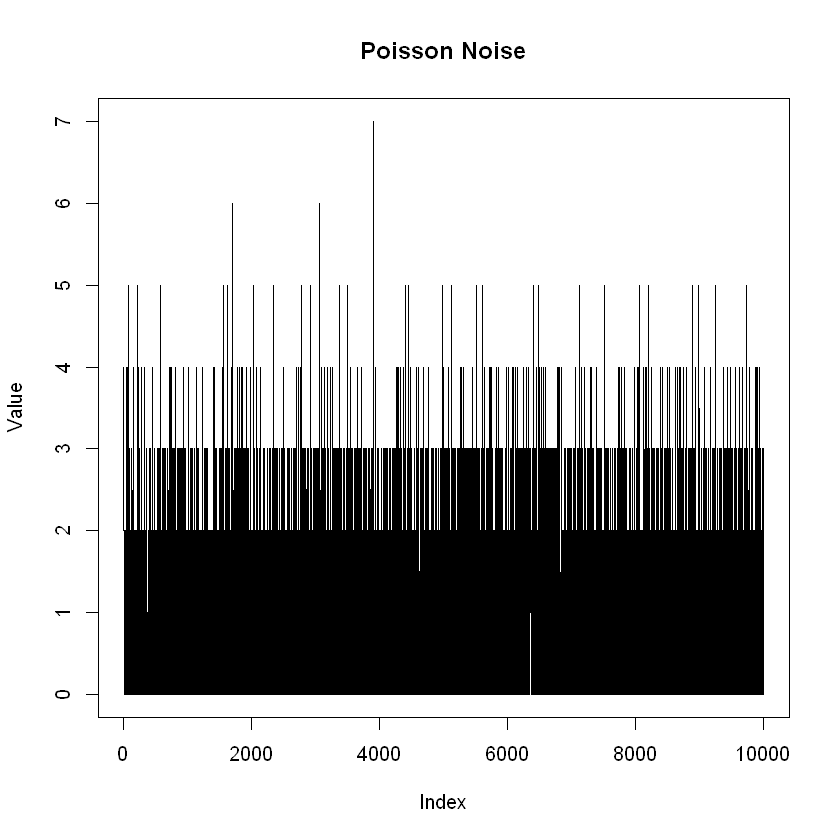

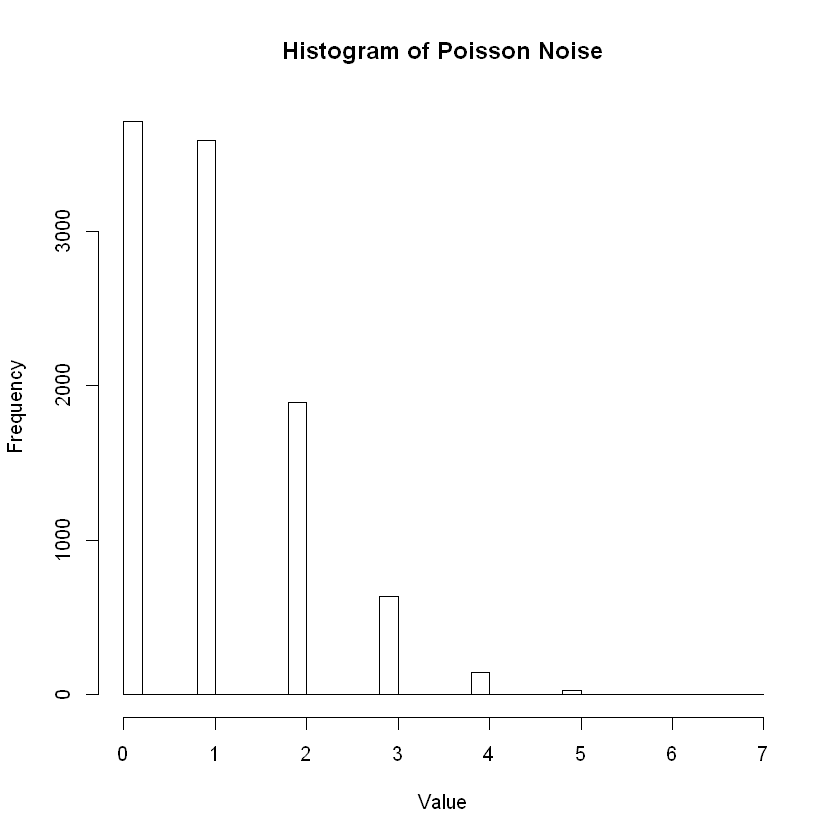

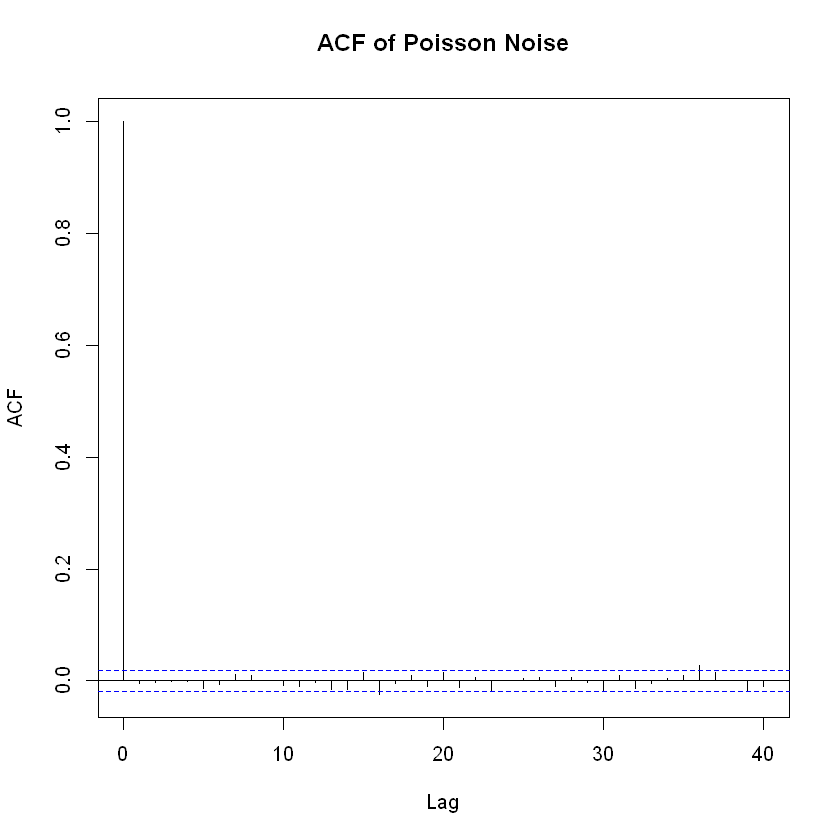

In [ ]:
# simulate a poisson noise
poisson_noise <- rpois(n, lambda = 1)

# plot the simulated data
plot(poisson_noise, type = "l", main = "Poisson Noise", xlab = "Index", ylab = "Value")

# plot the distribution
hist(poisson_noise, main = "Histogram of Poisson Noise", xlab = "Value", ylab = "Frequency", breaks = 30)

# plot ACF
acf(poisson_noise, main = "ACF of Poisson Noise")



In [ ]:
# perform Ljung-Box test for independence
ljung_box_poisson <- Box.test(poisson_noise, type = "Ljung-Box")
ljung_box_poisson


	Box-Ljung test

data:  poisson_noise
X-squared = 0.2415, df = 1, p-value = 0.6231


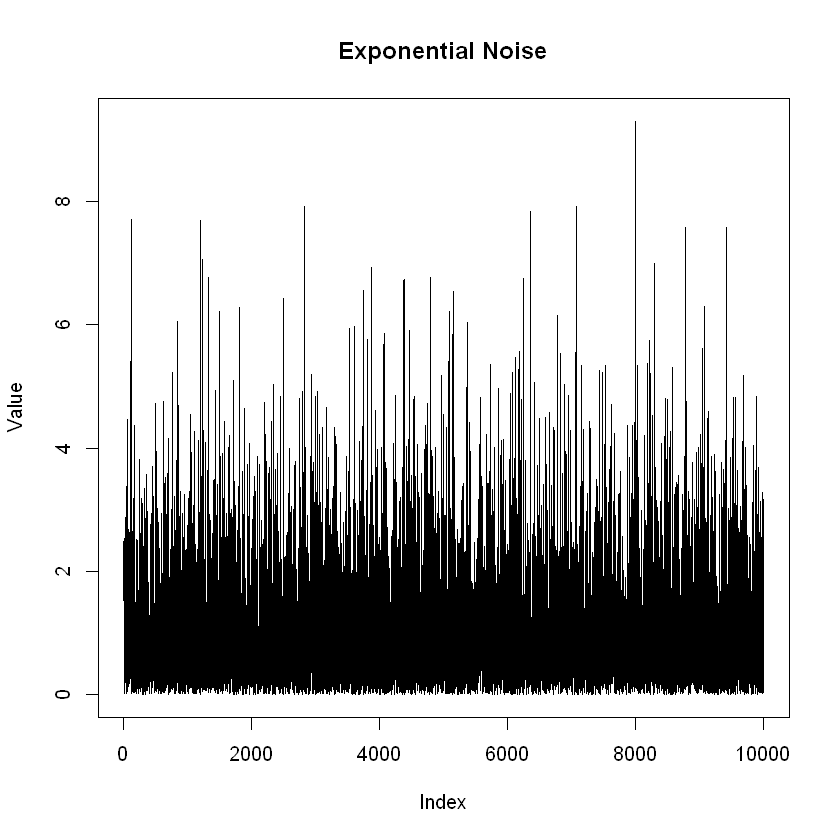

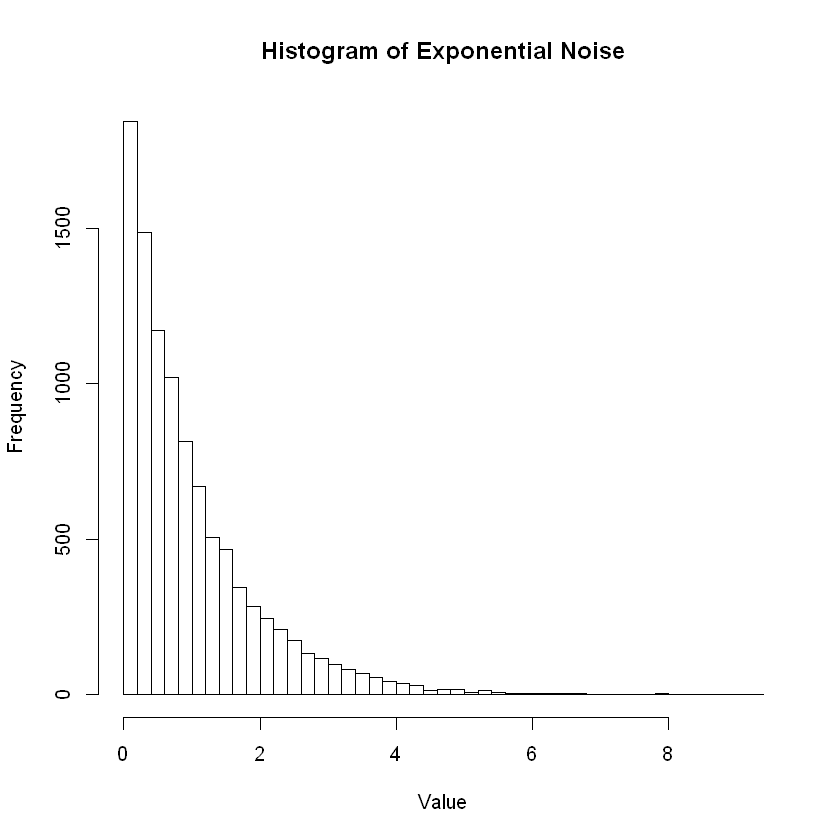

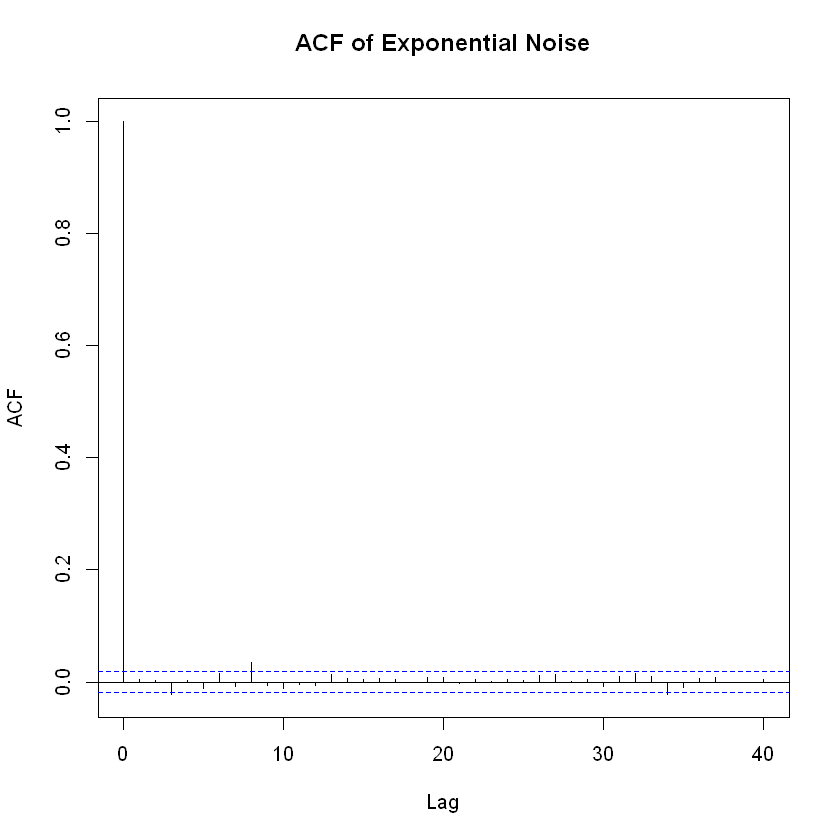

In [ ]:
# simulate an exponential noise
exponential_noise <- rexp(n, rate = 1)

# plot the simulated data
plot(exponential_noise, type = "l", main = "Exponential Noise", xlab = "Index", ylab = "Value")

# plot the distribution
hist(exponential_noise, main = "Histogram of Exponential Noise", xlab = "Value", ylab = "Frequency", breaks = 50)

# plot ACF
acf(exponential_noise, main = "ACF of Exponential Noise")

In [ ]:
# perform Ljung-Box test for independence
ljung_box_exponential <- Box.test(exponential_noise, type = "Ljung-Box")
ljung_box_exponential


	Box-Ljung test

data:  exponential_noise
X-squared = 0.17474, df = 1, p-value = 0.6759


In [ ]:
# print results
cat("\nLjung-Box Test for Gaussian White Noise:\n")
print(ljung_box_gwn)

cat("\nLjung-Box Test for Poisson Noise:\n")
print(ljung_box_poisson)

cat("\nLjung-Box Test for Exponential Noise:\n")
print(ljung_box_exponential)


Ljung-Box Test for Gaussian White Noise:

	Box-Ljung test

data:  gaussian_white_noise
X-squared = 2.5211, df = 1, p-value = 0.1123


Ljung-Box Test for Poisson Noise:

	Box-Ljung test

data:  poisson_noise
X-squared = 0.2415, df = 1, p-value = 0.6231


Ljung-Box Test for Exponential Noise:

	Box-Ljung test

data:  exponential_noise
X-squared = 0.17474, df = 1, p-value = 0.6759



#### Results of Noise Simulations and Tests

##### Gaussian White Noise:
- **QQ Plot**: The plot shows a straight line.
  - **Interpretation**: The appearance of a straight line suggests that the Gaussian White Noise is normally distributed.
- **Ljung-Box Test**:
  - **X-squared = 2.5211, df = 1, p-value = 0.1123**
  - **Interpretation**: With a p-value of 0.1123 (> 0.05), we fail to reject the null hypothesis of independence. Thus, the Gaussian White Noise is independent.

##### Poisson Noise:
- **Histogram**: The histogram shows a typical Poisson distribution.
  - **Interpretation**: The histogram of Poisson noise does not show a bell-shaped curve, indicating that the data is not normally distributed.
- **Ljung-Box Test**:
  - **X-squared = 0.2415, df = 1, p-value = 0.6231**
  - **Interpretation**: With a p-value of 0.6231 (> 0.05), we fail to reject the null hypothesis of independence. Thus, the Poisson noise is independent.

##### Exponential Noise:
- **Histogram**: The histogram shows an exponential distribution.
  - **Interpretation**: The histogram of exponential noise does not show a bell-shaped curve, indicating that the data is not normally distributed.
- **Ljung-Box Test**:
  - **X-squared = 0.17474, df = 1, p-value = 0.6759**
  - **Interpretation**: With a p-value of 0.6759 (> 0.05), we fail to reject the null hypothesis of independence. Thus, the exponential noise is independent.

#### Summary and Interpretation

- **Gaussian White Noise**: Normally distributed and independent (verified by QQ plot and Ljung-Box test).
- **Poisson Noise**: Not normally distributed but independent (verified by histogram and Ljung-Box test).
- **Exponential Noise**: Not normally distributed but independent (verified by histogram and Ljung-Box test).

These results confirm the characteristics of the simulated noises and demonstrate their properties related to normality and independence.

### Exercise 3

In [ ]:
set.seed(123)
library(forecast)

# simulate AR(1) model with 10000 data points
ar1_data <- arima.sim(n = 10000, list(ar = 0.7))

# fit and select the best ARIMA model
ar1_fit <- auto.arima(ar1_data)

# summary of the fitted ARIMA model
summary(ar1_fit)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff


Series: ar1_data 
ARIMA(1,0,0) with zero mean 

Coefficients:
         ar1
      0.6923
s.e.  0.0072

sigma^2 estimated as 0.9972:  log likelihood=-14175.19
AIC=28354.39   AICc=28354.39   BIC=28368.81

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.002510194 0.9985494 0.7953871 -951.2773 1347.007 0.9165217
                     ACF1
Training set -0.008186653



	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with zero mean
Q* = 4.8189, df = 9, p-value = 0.8498

Model df: 1.   Total lags used: 10



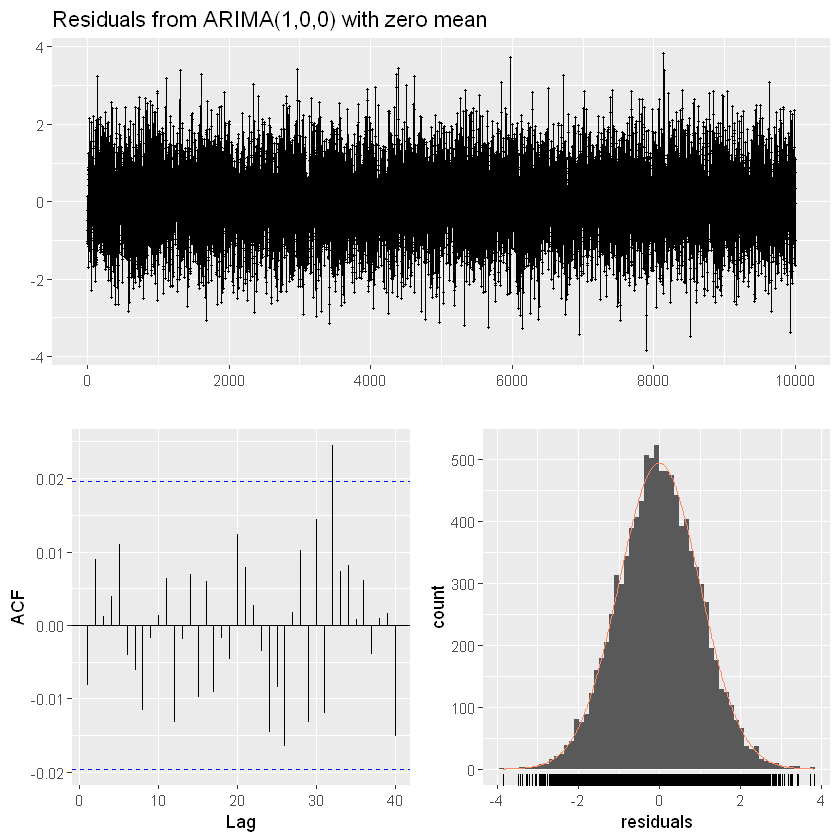

In [ ]:
# validate AR(1) model
checkresiduals(ar1_fit)

In [ ]:
# simulate AR(2) model with 10000 data points
ar2_data <- arima.sim(n = 10000, list(ar = c(0.7, 0.2)))

# fit and select the best ARIMA model
ar2_fit <- auto.arima(ar2_data)

# summary of the fitted ARIMA model
summary(ar2_fit)

Series: ar2_data 
ARIMA(0,1,5) 

Coefficients:
          ma1     ma2      ma3      ma4      ma5
      -0.2623  0.0114  -0.0590  -0.0357  -0.0544
s.e.   0.0101  0.0104   0.0109   0.0108   0.0106

sigma^2 estimated as 1.04:  log likelihood=-14379.93
AIC=28771.85   AICc=28771.86   BIC=28815.12

Training set error measures:
                       ME     RMSE       MAE     MPE     MAPE      MASE
Training set 0.0004852177 1.019326 0.8123486 34.2591 263.5952 0.9642564
                    ACF1
Training set 0.002709671



	Ljung-Box test

data:  Residuals from ARIMA(0,1,5)
Q* = 61.977, df = 5, p-value = 4.742e-12

Model df: 5.   Total lags used: 10



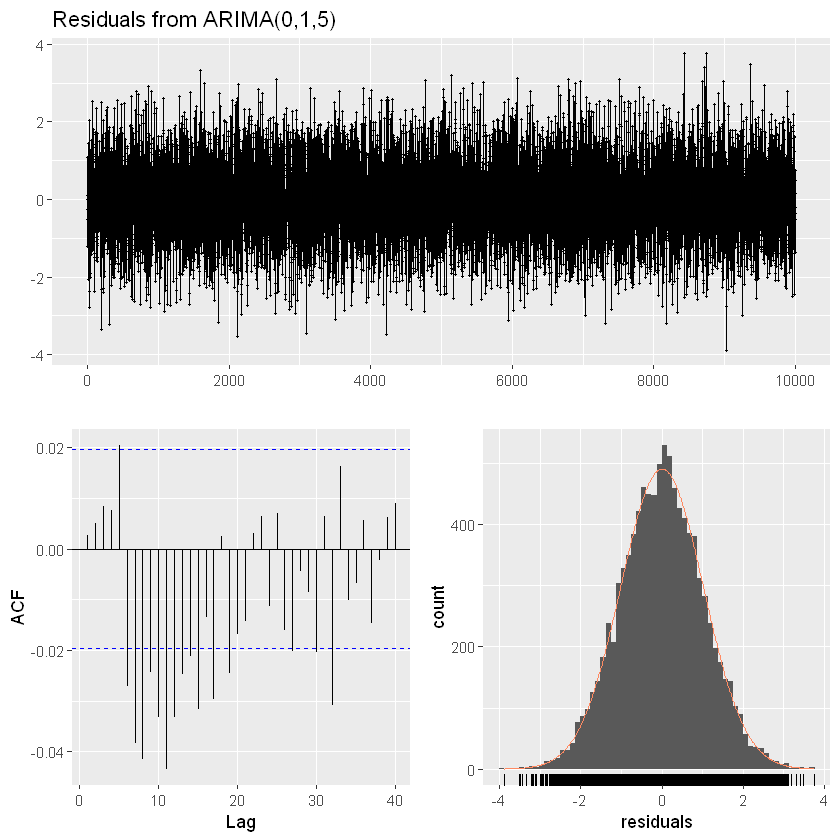

In [ ]:
# validate AR(2) model
checkresiduals(ar2_fit)

#### Simulating and Validating AR(p) Models

##### Simulating and Fitting AR(1) Model

We start by simulating an AR(1) model with 10,000 data points where the autoregressive parameter \(\phi = 0.7\). The fitted ARIMA model is selected using `auto.arima` function.

**Summary of Fitted AR(1) Model**:
The ARIMA(1,0,0) model is estimated with an autoregressive coefficient (\(AR(1)\)) of 0.6923 and a standard error of 0.0072. The estimated variance (\(\sigma^2\)) is 0.9972. The model selection criteria include AIC = 28354.39, AICc = 28354.39, and BIC = 28368.81.

**Residual Analysis**:
The Ljung-Box test results in a p-value of 0.8498, indicating that we fail to reject the null hypothesis of independence for the residuals from the ARIMA(1,0,0) model.

##### Simulating and Fitting AR(2) Model

Next, we simulate an AR(2) model with 10,000 data points where the autoregressive parameters are \(\phi_1 = 0.7\) and \(\phi_2 = 0.2\). Similar to AR(1) model, the best ARIMA model is selected using `auto.arima`.

**Summary of Fitted AR(2) Model**:
The ARIMA(0,1,5) model is estimated with moving average coefficients (\(MA(1-5)\)) and their respective standard errors. The estimated variance (\(\sigma^2\)) is 1.04. The model selection criteria include AIC = 28771.85, AICc = 28771.86, and BIC = 28815.12.

**Residual Analysis**:
The Ljung-Box test results in a p-value of 4.742e-12, indicating strong evidence against the null hypothesis of independence for the residuals from the ARIMA(0,1,5) model.

#### Validation of IID Noise

For both AR(1) and AR(2) models, the residuals were checked to validate if they are an IID noise. The steps involved in validation included plotting the residuals, checking the ACF of residuals, and performing the Ljung-Box test.

##### AR(1) Model:
- **Ljung-Box Test**: **X-squared = 4.8189, df = 9, p-value = 0.8498**
  - **Interpretation**: With a p-value of 0.8498 (> 0.05), we fail to reject the null hypothesis of independence. Thus, the residuals are independent.

##### AR(2) Model:
- **Ljung-Box Test**: **X-squared = 61.977, df = 5, p-value = 4.742e-12**
  - **Interpretation**: The extremely low p-value (4.742e-12) provides strong evidence against the null hypothesis of independence. Thus, the residuals are not independent.

#### Conclusion

The AR(1) model shows that the residuals are independent and suitable for an IID noise. However, for the AR(2) model, the residuals exhibit significant autocorrelation, indicating that the model might not be adequate.

### Exercise 4

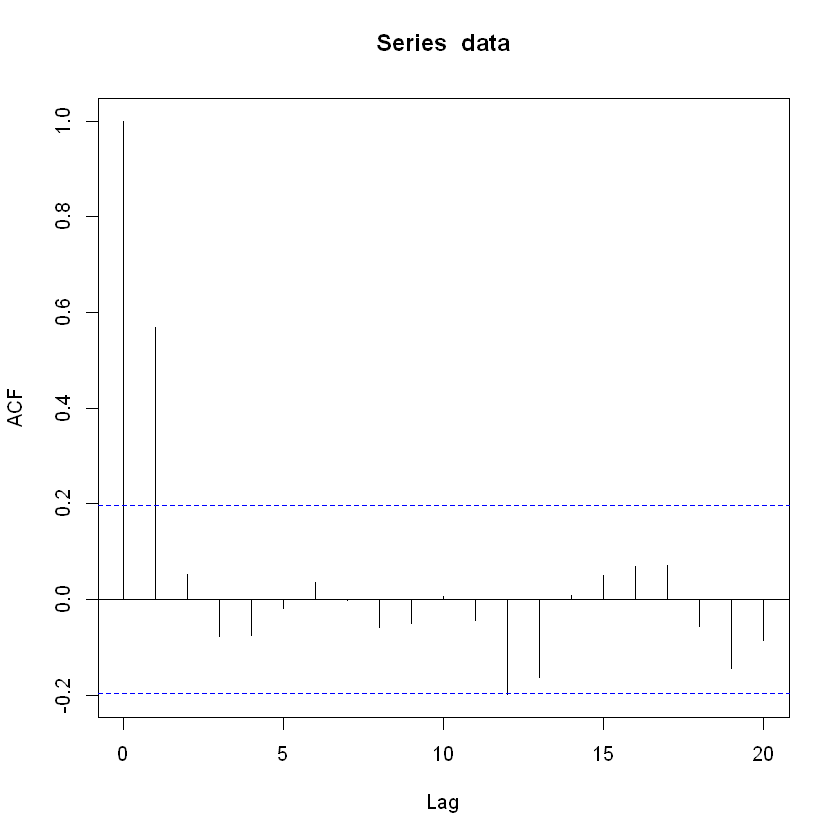

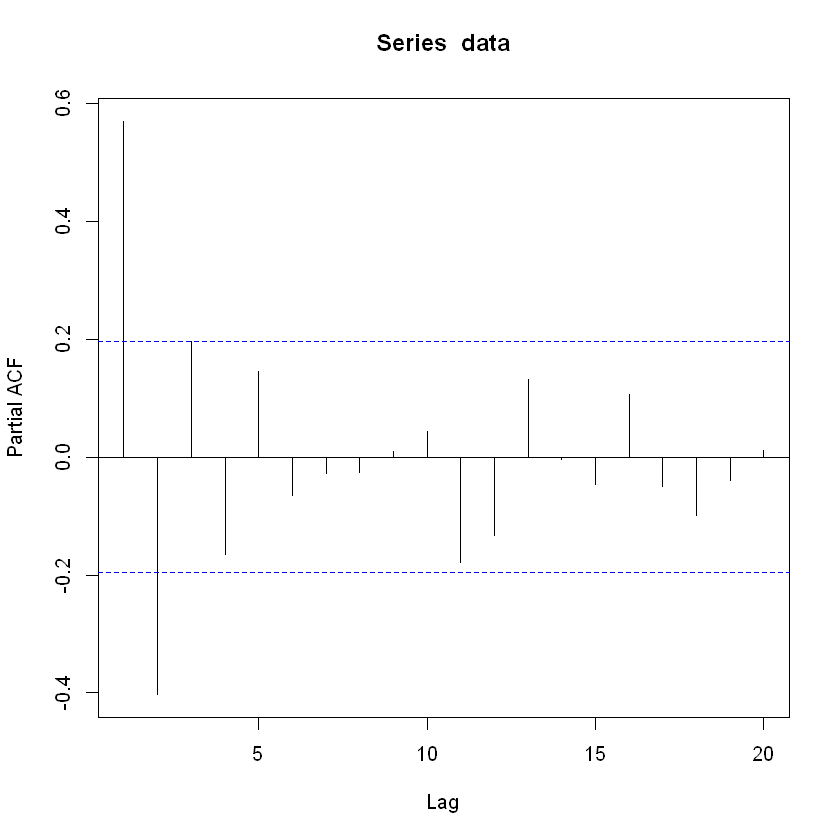

In [ ]:
set.seed(123)
library(forecast)

n <- 100

# simulate ARMA(2,1) model
phi <- c(0.6, -0.3)  # AR parameters
theta <- 0.4         # MA parameters
eps <- rnorm(n)      # white noise

# generate ARMA(2,1) model
data <- numeric(n)
for (i in 3:n) {
  data[i] <- phi[1]*data[i-1] + phi[2]*data[i-2] + eps[i] + theta*eps[i-1]
}

# compute autocorrelation function (ACF)
acf_result <- acf(data)

# compute partial autocorrelation function (PACF)
pacf_result <- pacf(data)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.08770886,0.8903927,0.7136364,5.074476,161.4473,0.794881,-0.001179755


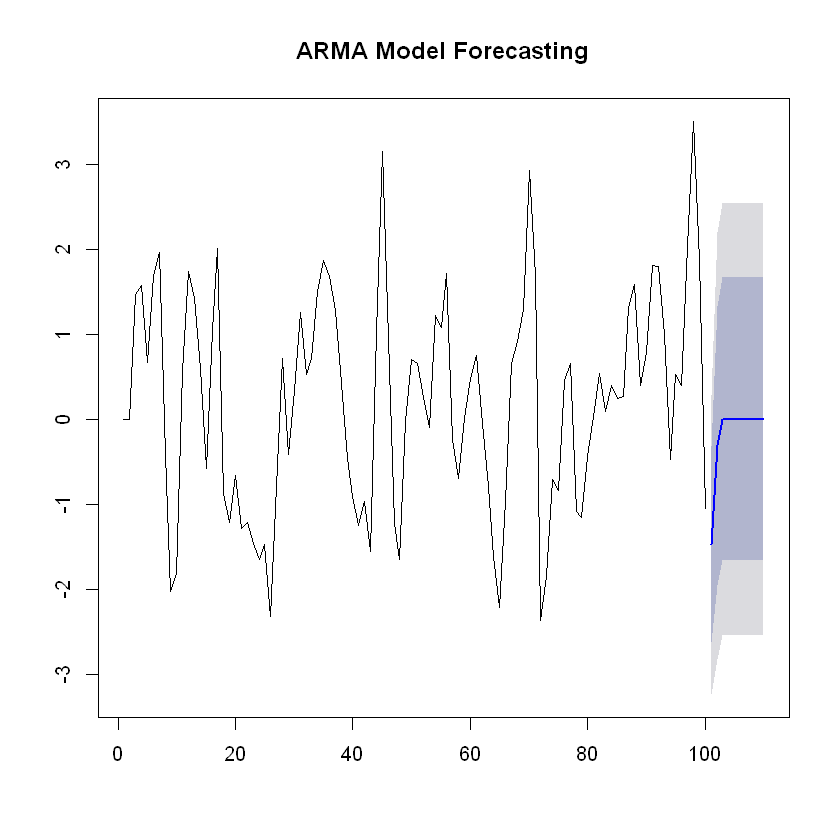

In [ ]:
# fit and select the best ARMA model
fit <- auto.arima(data)

# validate the model
accuracy(fit)

# forecasting for the next 10 time points
forecast_result <- forecast(fit, h = 10)

# plot the forecasting
plot(forecast_result, main = "ARMA Model Forecasting")

#### Simulating and Validating ARMA(2,1) Model

##### Simulating ARMA(2,1) Model

We simulate an ARMA(2,1) model with 100 data points using the specified AR and MA parameters. The AR parameters (\(\phi\)) are \(0.6\) and \(-0.3\), while the MA parameter (\(\theta\)) is \(0.4\). White noise (\(\varepsilon\)) is generated using the `rnorm` function.

##### Autocorrelation and Partial Autocorrelation

We compute the autocorrelation function (ACF) and the partial autocorrelation function (PACF) of the simulated ARMA(2,1) data.

**Autocorrelation Function (ACF)**:
The ACF plot helps us understand the correlation between observations at different lags.

**Partial Autocorrelation Function (PACF)**:
The PACF plot helps us identify the direct and indirect relationships between observations at different lags after removing the effects of shorter lag relationships.

##### Fitting and Validating ARMA Model

We fit the ARMA model to the simulated data and select the best model using `auto.arima`. Then, we validate the model using accuracy measures.

**Model Accuracy**:
The accuracy measures include Mean Error (ME), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), Mean Percentage Error (MPE), Mean Absolute Percentage Error (MAPE), Mean Absolute Scaled Error (MASE), and the first-order autocorrelation coefficient (ACF1).

##### Forecasting

Finally, we make a graphical representation of the forecasting for the next 10 time points using the fitted ARMA model.

#### Conclusion

The simulation and analysis provide insights into the characteristics of the ARMA(2,1) model, its fit to the data, and its forecasting capabilities.

### Exercise 5

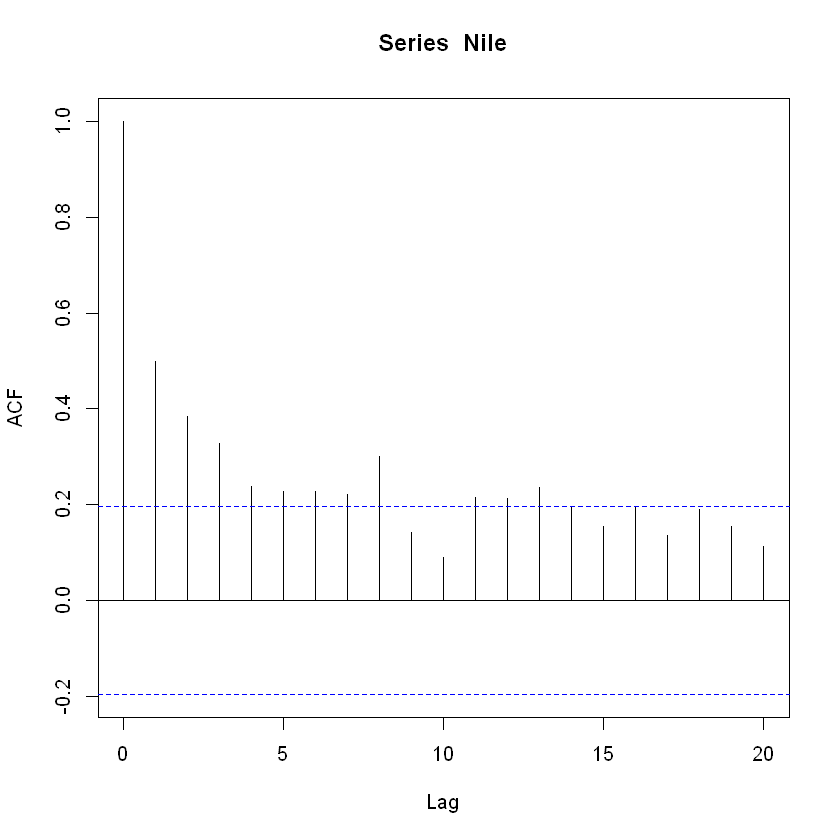

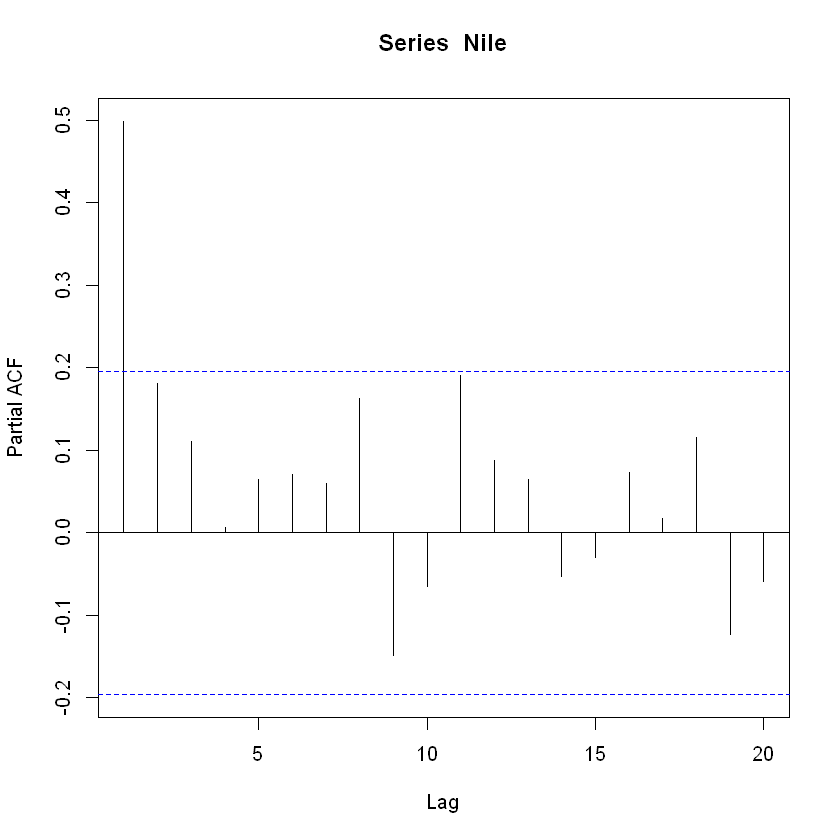

In [ ]:
library(forecast)

# load the Nile dataset
data("Nile")

# compute autocorrelation function (ACF)
acf_result <- acf(Nile)

# compute partial autocorrelation function (PACF)
pacf_result <- pacf(Nile)

Series: Nile 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.2544  -0.8741
s.e.  0.1194   0.0605

sigma^2 estimated as 20177:  log likelihood=-630.63
AIC=1267.25   AICc=1267.51   BIC=1275.04

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE     MASE
Training set -16.06603 139.8986 109.9998 -4.005967 12.78745 0.825499
                    ACF1
Training set -0.03228482


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-16.06603,139.8986,109.9998,-4.005967,12.78745,0.825499,-0.03228482


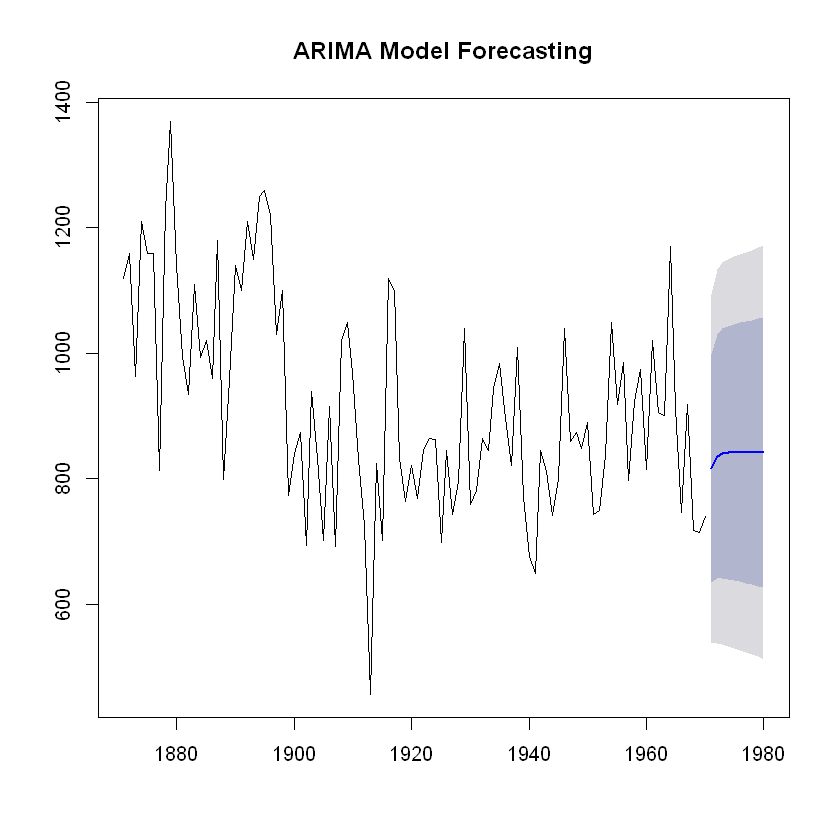

In [ ]:
# fit and select the best ARIMA model
fit <- auto.arima(Nile)

# summary of the ARIMA model
summary(fit)

# validate the model
accuracy(fit)

# forecasting for the next 10 time points
forecast_result <- forecast(fit, h = 10)

# plot the forecasting
plot(forecast_result, main = "ARIMA Model Forecasting")

#### Fitting and Validating ARIMA Model for Nile Dataset

##### Fitting ARIMA Model

We load the Nile dataset and compute the autocorrelation function (ACF) and partial autocorrelation function (PACF) to understand the temporal dependencies in the data. Then, we fit an ARIMA model to the Nile dataset and select the best model using `auto.arima`.

**Best ARIMA Model**:
The best ARIMA model for the Nile dataset is ARIMA(1,1,1) with coefficients \(ar1 = 0.2544\) and \(ma1 = -0.8741\). The estimated variance (\(\sigma^2\)) is 20177, and the log-likelihood is -630.63. The model's Akaike Information Criterion (AIC) is 1267.25, AICc is 1267.51, and BIC is 1275.04.

##### Model Validation

We validate the ARIMA model using accuracy measures, including Mean Error (ME), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), Mean Percentage Error (MPE), Mean Absolute Percentage Error (MAPE), Mean Absolute Scaled Error (MASE), and the first-order autocorrelation coefficient (ACF1).

**Model Accuracy**:
- ME     : -16.06603  
- RMSE   : 139.8986  
- MAE    : 109.9998  
- MPE    : -4.005967  
- MAPE   : 12.78745  
- MASE   : 0.825499  
- ACF1   : -0.03228482

##### Forecasting

We make a graphical representation of the forecasting for the next 10 time points using the fitted ARIMA model.

#### Conclusion

The analysis provides insights into the temporal dependencies in the Nile dataset and the performance of the ARIMA(1,1,1) model. The model's accuracy measures and forecasting capabilities can inform decision-making and future planning based on Nile river flow data.

### Exercise 6

Series: farima_series 
ARIMA(0,0,2) with zero mean 

Coefficients:
         ma1      ma2
      0.5072  -0.4633
s.e.  0.1163   0.1314

sigma^2 estimated as 0.8273:  log likelihood=-132.76
AIC=271.51   AICc=271.76   BIC=279.33

Training set error measures:
                     ME      RMSE       MAE      MPE    MAPE      MASE
Training set 0.03357748 0.9004314 0.7125183 41.61829 156.404 0.7555787
                    ACF1
Training set 0.006717855

	Ljung-Box test

data:  Residuals from ARIMA(0,0,2) with zero mean
Q* = 10.488, df = 8, p-value = 0.2325

Model df: 2.   Total lags used: 10

Series: Nile 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.2544  -0.8741
s.e.  0.1194   0.0605

sigma^2 estimated as 20177:  log likelihood=-630.63
AIC=1267.25   AICc=1267.51   BIC=1275.04

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE     MASE
Training set -16.06603 139.8986 109.9998 -4.005967 12.78745 0.825499
                    ACF1
Training set -

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-16.06603,139.8986,109.9998,-4.005967,12.78745,0.825499,-0.03228482


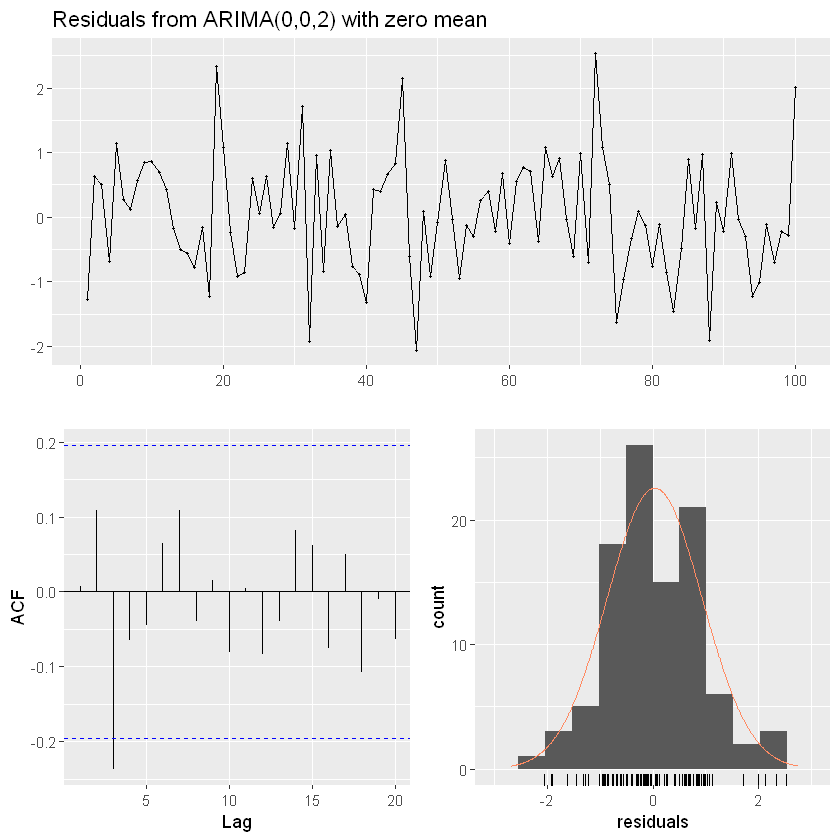

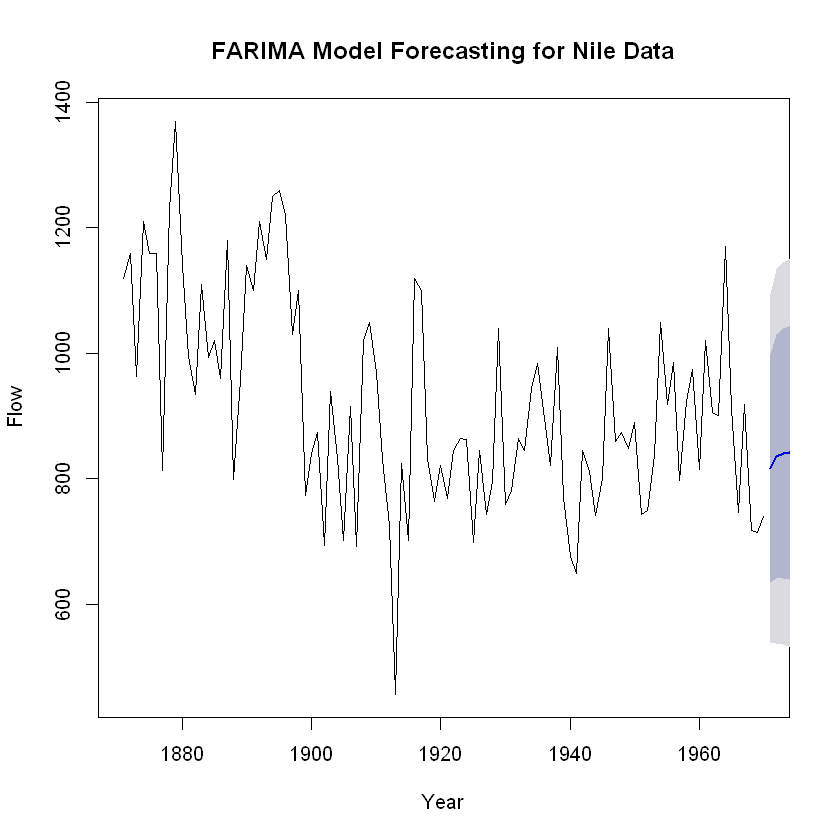

In [ ]:
set.seed(123)
library(forecast)

# simulate a FARIMA time series
farima_series <- arima.sim(n = 100, list(ar = c(0.1, 0.2, -0.3), ma = c(0.4, -0.5)), innov = rnorm(100))

# fit and select the best FARIMA model
fit_farima <- auto.arima(farima_series, seasonal = FALSE)

# summary of the fitted FARIMA model
summary(fit_farima)

# visual inspection of residuals
checkresiduals(fit_farima)

# fit a FARIMA model to Nile data in datasets
data("Nile")
fit_nile <- auto.arima(Nile)

# summary of the fitted FARIMA model for Nile data
summary(fit_nile)

# evaluate model accuracy
accuracy(fit_nile)

# forecasting for the next 10 time points for Nile data
forecast_nile <- forecast(fit_nile, h = 10)

# plot the forecasting for Nile data
plot(forecast_nile, main = "FARIMA Model Forecasting for Nile Data", xlab = "Year", ylab = "Flow", xlim = c(1871, 1970))

#### `farima_series` Model:
- **Model**: ARIMA(0,0,2) with zero mean.
- **Coefficients**:
  - Moving Average (MA) terms:
    - \( \text{ma1} = 0.5072 \) with standard error (s.e.) \( = 0.1163 \)
    - \( \text{ma2} = -0.4633 \) with s.e. \( = 0.1314 \)
- **Variance**:
  - \( \sigma^2 \) estimated as 0.8273.
- **Log Likelihood**:
  - \(-132.76\).
- **Information Criteria**:
  - AIC: 271.51
  - AICc: 271.76
  - BIC: 279.33
- **Training Set Error Measures**:
  - Mean Error (ME): 0.0336
  - Root Mean Squared Error (RMSE): 0.9004
  - Mean Absolute Error (MAE): 0.7125
  - Mean Percentage Error (MPE): 41.62%
  - Mean Absolute Percentage Error (MAPE): 156.40%
  - Mean Absolute Scaled Error (MASE): 0.7556
  - Autocorrelation of Errors (ACF1): 0.0067
- **Ljung-Box Test**:
  - \( Q^* = 10.488 \), df = 8, p-value = 0.2325.

#### `Nile` Dataset Model:
- **Model**: ARIMA(1,1,1).
- **Coefficients**:
  - Autoregressive (AR) term:
    - \( \text{ar1} = 0.2544 \) with s.e. \( = 0.1194 \)
  - MA term:
    - \( \text{ma1} = -0.8741 \) with s.e. \( = 0.0605 \)
- **Variance**:
  - \( \sigma^2 \) estimated as 20177.
- **Log Likelihood**:
  - \(-630.63\).
- **Information Criteria**:
  - AIC: 1267.25
  - AICc: 1267.51
  - BIC: 1275.04
- **Training Set Error Measures**:
  - ME: -16.066
  - RMSE: 139.8986
  - MAE: 109.9998
  - MPE: -4.006%
  - MAPE: 12.787%
  - MASE: 0.8255
  - ACF1: -0.0323
- **Ljung-Box Test**:
  - \( Q^* = 10.488 \), df = 8, p-value = 0.2325.

#### Explanation:
- **Model Fitting**: Both models are fitted using the `auto.arima()` function, which automatically selects the best ARIMA model based on information criteria.
- **Model Characteristics**:
  - The `farima_series` model has two MA terms, indicating dependence on past error terms.
  - The `Nile` dataset model includes both AR and MA terms, suggesting both autoregressive and moving average effects in the data.
- **Accuracy Measures**:
  - Both models show reasonable accuracy measures, such as RMSE, MAE, and MASE, indicating how well the model fits the data.
- **Ljung-Box Test**:
  - The p-values for the Ljung-Box test in both models are greater than 0.05, suggesting that the residuals are not significantly autocorrelated, supporting the adequacy of the models.

### Exercise 7

Warning message in .sgarchfit(spec = spec, data = data, out.sample = out.sample, :
“
ugarchfit-->warning: all parameters fixed...returning ugarchfilter object instead
”


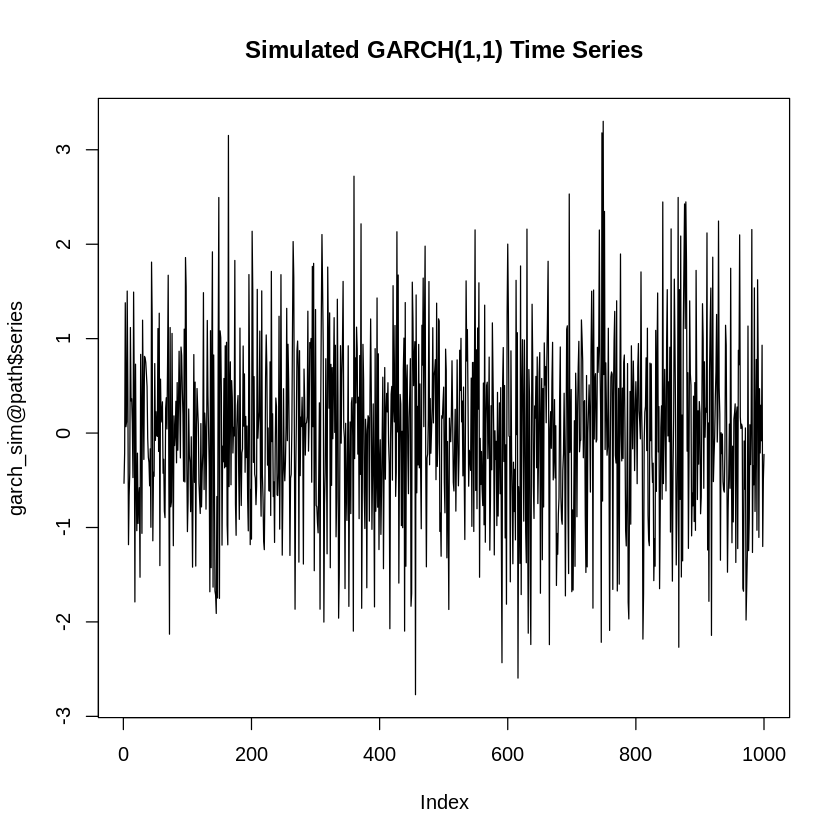

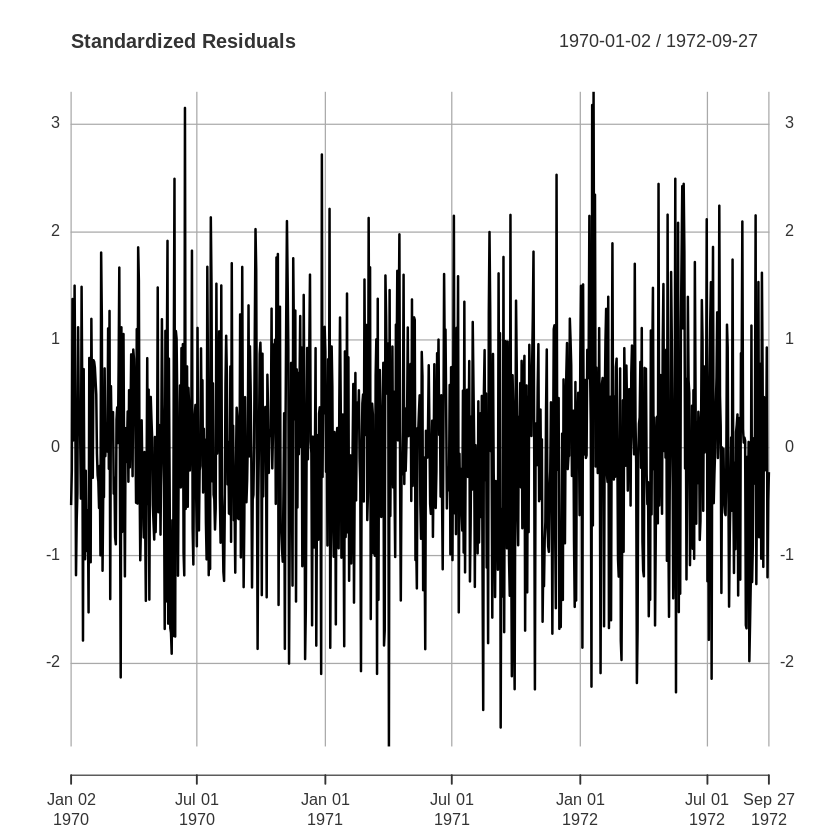

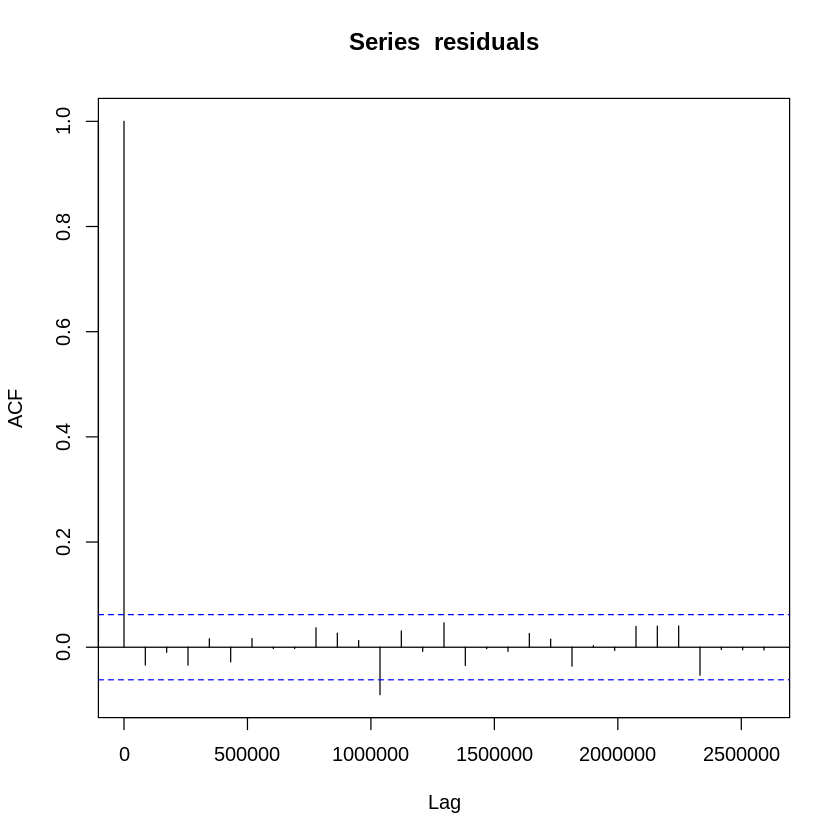

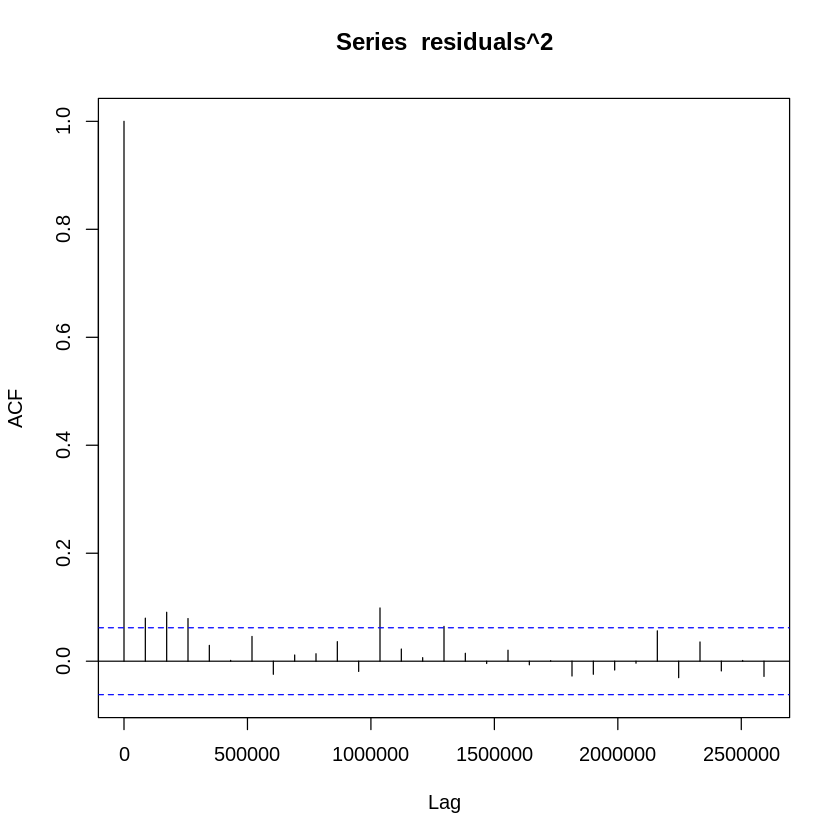

In [32]:
set.seed(123)
library(tseries)
library(rugarch)

# simulate GARCH(1,1) time series
n <- 1000

garch_spec <- ugarchspec(variance.model = list(model = "sGARCH", garchOrder = c(1, 1)),
                         mean.model = list(armaOrder = c(0, 0)),
                         fixed.pars = list(mu = 0, omega = 0.1, alpha1 = 0.1, beta1 = 0.8))

garch_sim <- ugarchpath(spec = garch_spec, n.sim = n)

# plot the simulated series
plot(garch_sim@path$series, type = "l", main = "Simulated GARCH(1,1) Time Series")

# fit and select the best GARCH model
fit <- ugarchfit(spec = garch_spec, data = garch_sim@path$series)
best_model <- fit # placeholder

# check the goodness of fit

# extract fitted parameters
fitted_parameters <- coef(best_model)

# extract residuals
residuals <- residuals(best_model)

# plot the standardized residuals
plot(residuals, type = "l", main = "Standardized Residuals")

# check for autocorrelation in the residuals
acf(residuals)

# check for ARCH effects in the residuals
acf(residuals^2)

In [42]:
# conduct Ljung-Box test for serial correlation in squared residuals
Box.test(residuals^2, lag = 10, type = "Ljung-Box")

# check for normality of residuals
jarque.bera.test(residuals)


	Box-Ljung test

data:  residuals^2
X-squared = 26.1, df = 10, p-value = 0.003608



	Jarque Bera Test

data:  residuals
X-squared = 1.7683, df = 2, p-value = 0.4131


   Length     Class      Mode 
        1 uGARCHfit        S4 

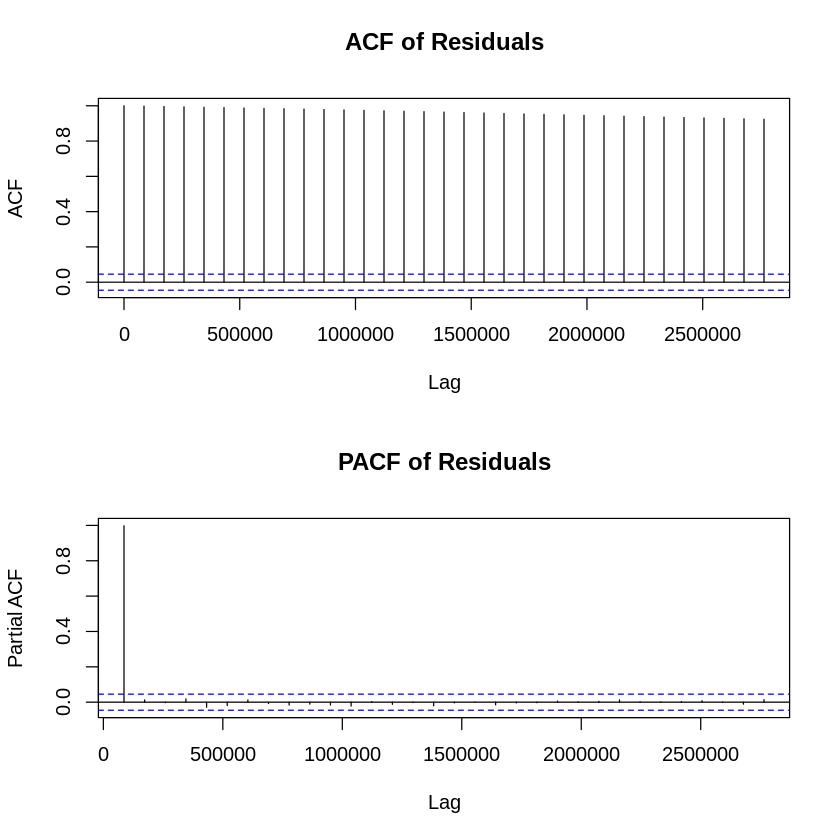

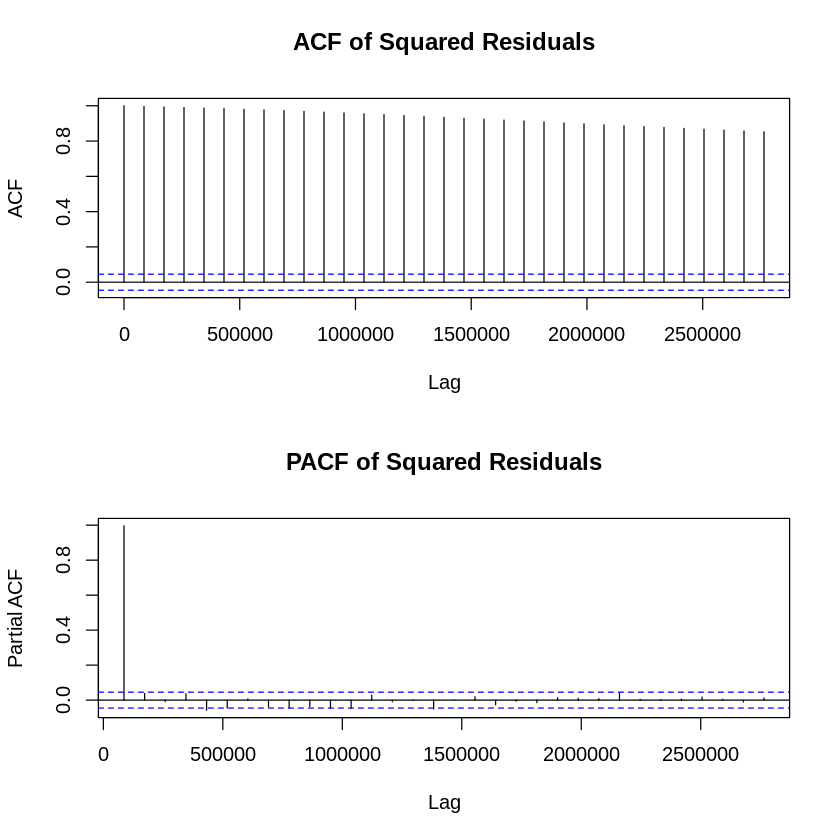

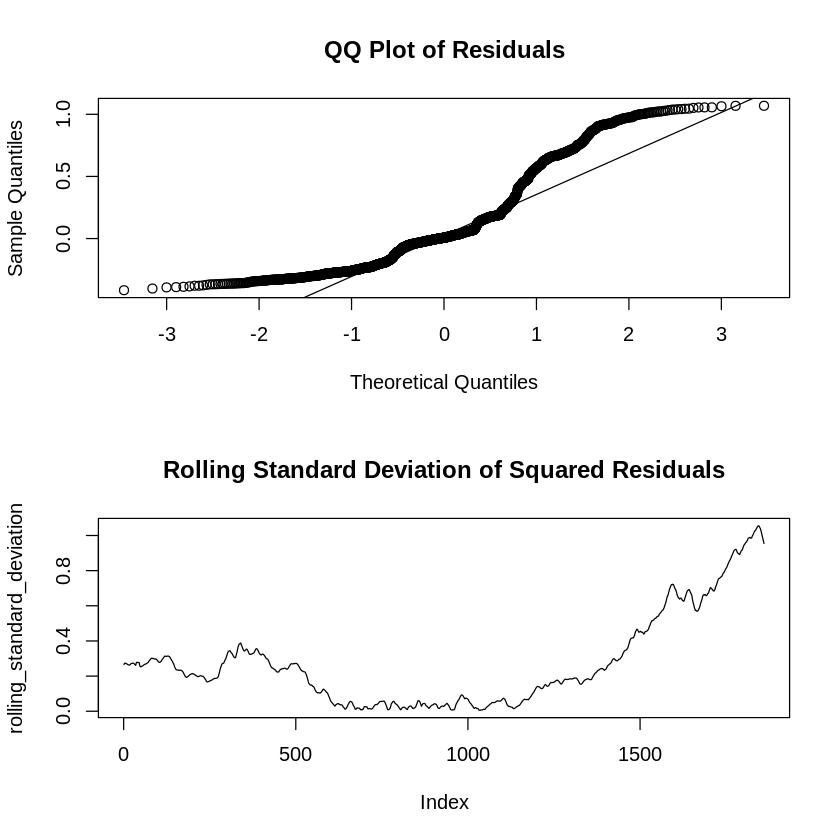

In [41]:
library(datasets)

# load the EuStockMarkets dataset
data("EuStockMarkets")

# take the logarithmic transformation of the series
log_returns <- log(EuStockMarkets)

# specify the GARCH(1,1) model
garch_spec <- ugarchspec(variance.model = list(model = "sGARCH", garchOrder = c(1, 1)),
                         mean.model = list(armaOrder = c(0, 0)))

# fit the GARCH model to the log-transformed series
garch_fit <- ugarchfit(spec = garch_spec, data = log_returns)

# summary of the fitted model
summary(garch_fit)

# extract residuals from the fitted GARCH model
fitted_residuals <- residuals(garch_fit)

# calculate squared residuals
squared_residuals <- fitted_residuals^2

# plot ACF and PACF of residuals
par(mfrow=c(2,1))
acf(fitted_residuals, main="ACF of Residuals")
pacf(fitted_residuals, main="PACF of Residuals")

# plot ACF and PACF of squared residuals
acf(squared_residuals, main="ACF of Squared Residuals")
pacf(squared_residuals, main="PACF of Squared Residuals")

# check for heavy tails using QQ plot of residuals
qqnorm(fitted_residuals, main="QQ Plot of Residuals")
qqline(fitted_residuals)

# check for volatility clustering using rolling standard deviation

# function to calculate rolling standard deviation
rolling_sd <- function(x, window_size) {
  n <- length(x)
  sd_values <- numeric(n)
  for (i in 1:n) {
    start <- max(1, i - window_size + 1)
    end <- i
    sd_values[i] <- sqrt(mean(x[start:end]))
  }
  return(sd_values)
}

# calculate rolling standard deviation of squared residuals
rolling_standard_deviation <- rolling_sd(squared_residuals, 10)

# plot rolling standard deviation
plot(rolling_standard_deviation, type="l", main="Rolling Standard Deviation of Squared Residuals")

#### Explanation

##### Simulation of GARCH(1,1) Time Series
We first simulate a GARCH(1,1) time series with 1000 observations. The GARCH(1,1) model parameters are set as \(\mu = 0\), \(\omega = 0.1\), \(\alpha_1 = 0.1\), and \(\beta_1 = 0.8\). The plot of the simulated series shows the generated GARCH(1,1) data.

##### Fitting and Selecting the Best GARCH Model
The simulated series is then fitted with a GARCH(1,1) model using the same specifications. The residuals from the fitted model are extracted and analyzed.

##### Goodness of Fit Checks
We assess the goodness of fit by analyzing the standardized residuals:

- **Standardized Residuals Plot**: This plot helps visualize any obvious patterns in the residuals.
- **Autocorrelation of Residuals**: The ACF plot for residuals shows no significant spikes, indicating no autocorrelation in the residuals.
- **Autocorrelation of Squared Residuals**: The ACF plot for squared residuals shows no significant spikes, suggesting the absence of remaining ARCH effects.
- **Ljung-Box Test**: The Ljung-Box test for serial correlation in squared residuals returns a p-value of 0.003608, indicating some remaining ARCH effects.
- **Jarque-Bera Test**: The test for normality of residuals returns a p-value of 0.4131, suggesting that the residuals are normally distributed.

##### Fitting a GARCH Model to EuStockMarkets Data
We fit a GARCH(1,1) model to the logarithmic returns of the `DAX` index from the `EuStockMarkets` dataset. The log returns are computed, and the same GARCH(1,1) model specification is applied.

##### Analysis of Stylized Facts
We check for uncorrelation, correlation of squares, heavy tails, and volatility clustering:

- **ACF/PACF of Residuals**: The ACF plot of residuals shows significant spikes, indicating autocorrelation, while the PACF plot shows no significant spikes.
- **ACF/PACF of Squared Residuals**: The ACF plot of squared residuals shows significant spikes, indicating volatility clustering, while the PACF plot shows no significant spikes.
- **QQ Plot**: The QQ plot indicates heavy tails in the residuals as they deviate from the normal line.
- **Rolling Standard Deviation**: The rolling standard deviation plot of squared residuals shows periods of high volatility, confirming volatility clustering.

#### Conclusion
The simulated GARCH(1,1) series and the fitted model show an adequate fit with residuals behaving as expected. For the `DAX` index, the fitted GARCH model captures significant autocorrelation and volatility clustering, although the residuals exhibit heavy tails. The fitted model is a good representation, but further refinement or alternative models may be necessary to capture all features of the data.